In [2]:
from IPython.display import clear_output
from datetime import datetime

import os
from os.path import join as opj
if "SCRATCH" not in os.environ:
    os.environ["SCRATCH"] = "/mnt/c/Users/sebas/OneDrive/SCRATCH"

import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

import delensalot
from delensalot.run import run
from delensalot.lerepi.visalot import plot_helper as ph


fn = opj(os.getcwd(), 'examples/conf_mwe_workbench.py')
ana_mwe_OBD = run(config=fn, job_id='delens', verbose=True)
ana_mwe_OBD.run()
ana_mwe_OBD = ana_mwe_OBD.job

INFO:: 05-18 11:44:: delensalot.lerepi.core.handler.log - load_configfile() Started: /mnt/c/Users/sebas/OneDrive/Desktop/Uni/ext/git/delensalot/notebooks/examples/conf_mwe_workbench.py
INFO:: 05-18 11:44:: delensalot.lerepi.core.metamodel.dlensalot_mm.__attrs_post_init__ - Setting default, using P_FS_CMBS4:
	{'meta': {'version': '0.2'}, 'job': {'jobs': ['generate_sim', 'QE_lensrec', 'MAP_lensrec']}, 'data': {'beam': 1.0, 'nlev_t': 1.0, 'nlev_p': 1.0, 'epsilon': 1e-05, 'nside': 2048, 'class_parameters': {'lmax': 4096, 'cls_unl': {'tt': array([0.00000000e+00, 3.15384486e+03, 1.08426834e+03, ...,
       9.66229400e-10, 9.65260803e-10, 9.64292720e-10]), 'ee': array([0.00000000e+00, 0.00000000e+00, 3.62414129e-02, ...,
       2.00006407e-12, 1.99423451e-12, 1.98828000e-12]), 'bb': array([0., 0., 0., ..., 0., 0., 0.]), 'te': array([0.00000000e+00, 0.00000000e+00, 2.93875049e+00, ...,
       1.40842175e-11, 1.40724986e-11, 1.40607859e-11]), 'pp': array([0.00000000e+00, 5.94954817e-08, 8.92404

In [6]:
cls, _ = ana_mwe_OBD.read_data()

INFO:: 05-18 11:46:: delensalot.core.handler.log - read_data() started
Loading 1 sims
INFO:: 05-18 11:46:: delensalot.core.handler.log - read_data() finished


[  16.   45.   75.  105.  135.  165.  190.  250.  400.  600.  850. 1250.
 1750. 2500. 3500. 4500.]


[]

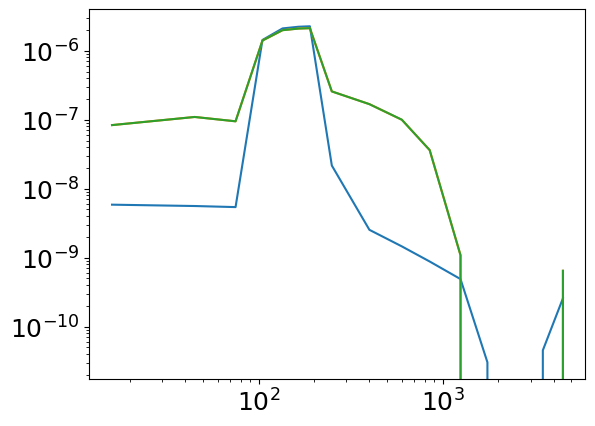

In [20]:
print(ana_mwe_OBD.edges_center)
plt.plot(ana_mwe_OBD.edges_center, cls[0,0,0,:]*ana_mwe_OBD.ct[1:])
plt.plot(ana_mwe_OBD.edges_center, cls[1,0,0,:]*ana_mwe_OBD.ct[1:])
plt.plot(ana_mwe_OBD.edges_center, cls[2,0,0,:]*ana_mwe_OBD.ct[1:])
plt.loglog()

In [16]:
ana_mwe_OBD.ct

array([1.97459570e-06, 1.99825561e-06, 2.03276495e-06, 2.04867131e-06,
       2.07258570e-06, 2.12693451e-06, 2.20625046e-06, 2.25882075e-06,
       2.20043690e-06, 1.59447428e-06, 1.09974309e-06, 6.26830903e-07,
       2.40033586e-07, 8.70791079e-08, 1.54773076e-08, 4.34020330e-09,
       1.72406283e-09])

In [4]:
fn = opj(os.getcwd(), 'examples/conf_mwe_workbench.py')
ana_mwe_OBD = run(config=fn, job_id='QE_lensrec', verbose=True)
ana_mwe_OBD.run()
ana_mwe_OBD = ana_mwe_OBD.job

clear_output(wait=True)
print("Cell finished {}".format(datetime.now().strftime("%H:%M:%S")))

Cell finished 11:40:17


In [2]:
fn = opj(os.getcwd(), 'examples/conf_mwe_workbench.py')
ana_mwe_OBD = run(config=fn, job_id='delens', verbose=True)
ana_mwe_OBD.run()
ana_mwe_OBD = ana_mwe_OBD.job

NameError: name 'opj' is not defined

# CG solver testing

In [11]:
its = np.arange(0,27)
residuals_qe_south_mask = [np.load('/mnt/c/Users/sebas/OneDrive/SCRATCH/delensalot/generic/sims_cmb_len_lminB200_mfda_maskedsky_south/cgsolver/residual_{}_qe.npy'.format(it)) for it in its] 

/tmp/ipykernel_12870/3436642894.py:2: RuntimeWarning: invalid value encountered in divide
  hp.cartview(np.abs(hp.alm2map(np.nan_to_num(residuals_qe_south_mask[it]/residuals_qe_south_mask[0]),nside=256)), lonra=[80,190], latra=[-90,0])


1


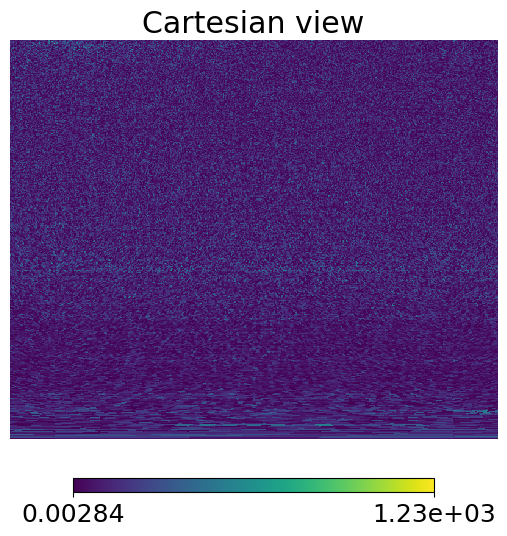

5


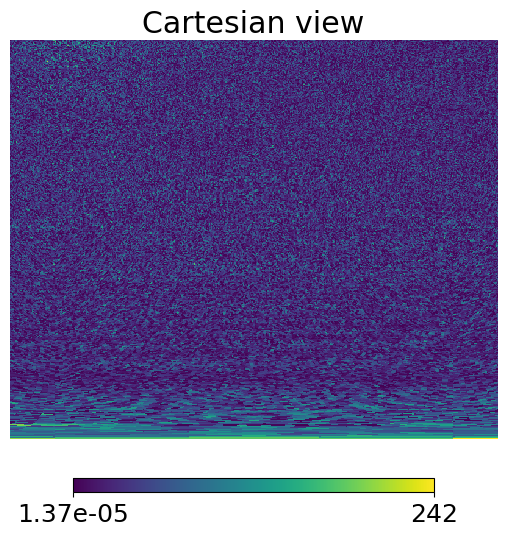

9


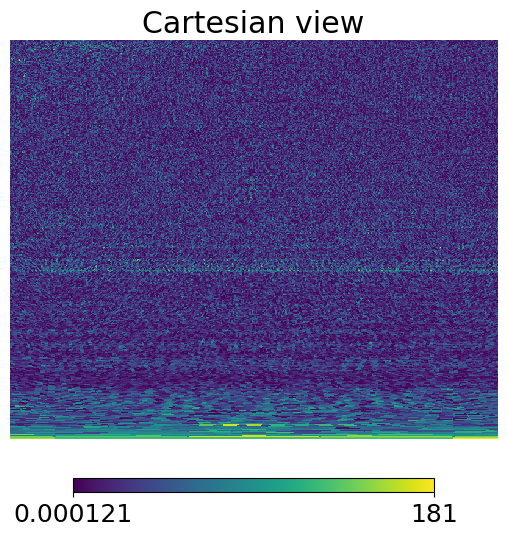

13


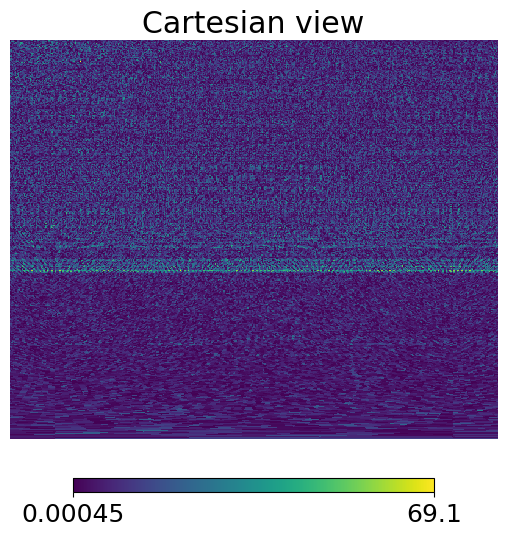

17


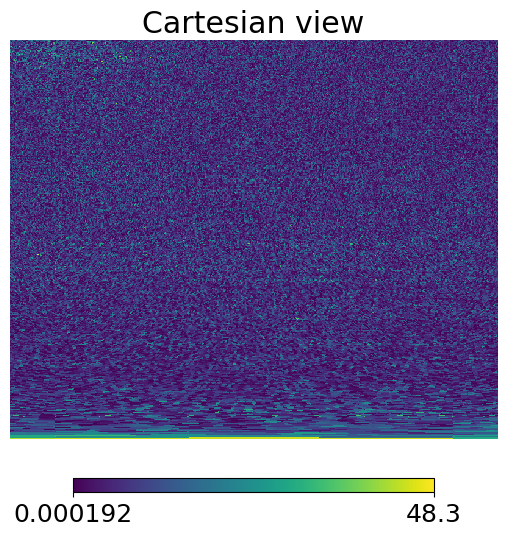

21


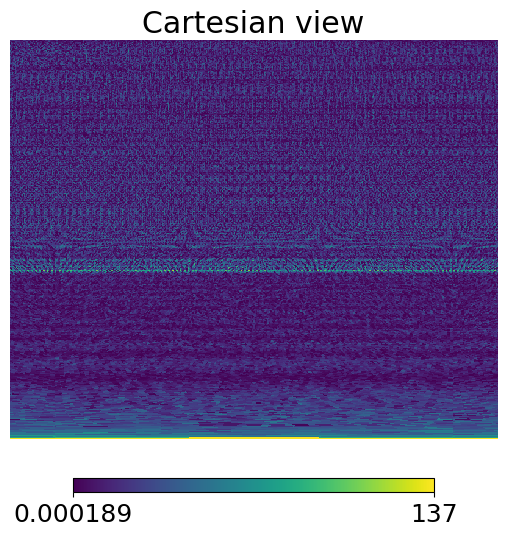

25


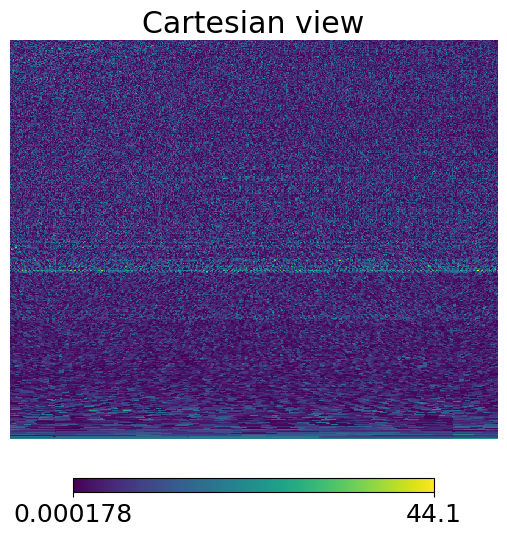

In [12]:
for it in np.arange(1,27,4):
    hp.cartview(np.abs(hp.alm2map(np.nan_to_num(residuals_qe_south_mask[it]/residuals_qe_south_mask[0]),nside=256)), lonra=[80,190], latra=[-90,0])
    print(it)
    plt.show()

1


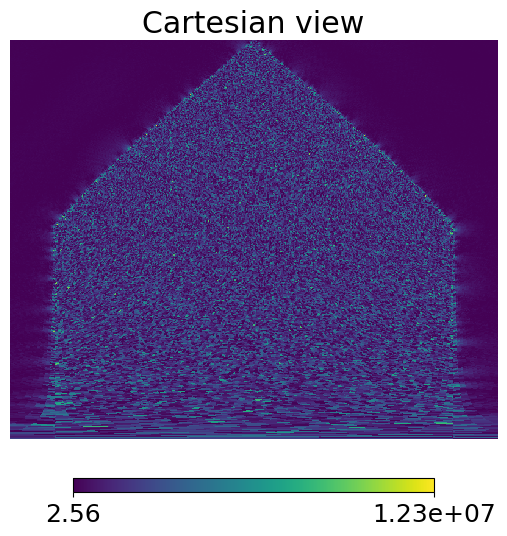

5


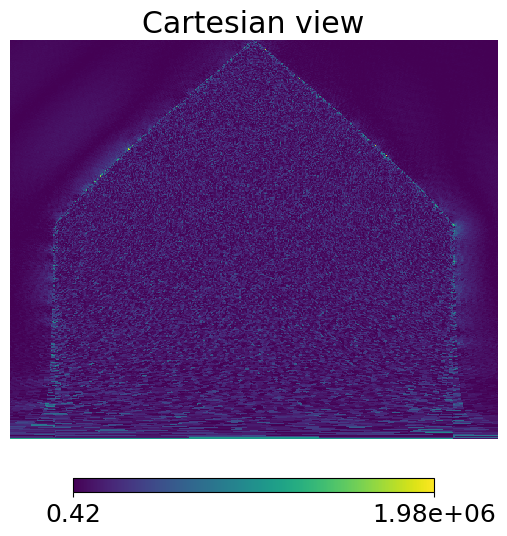

9


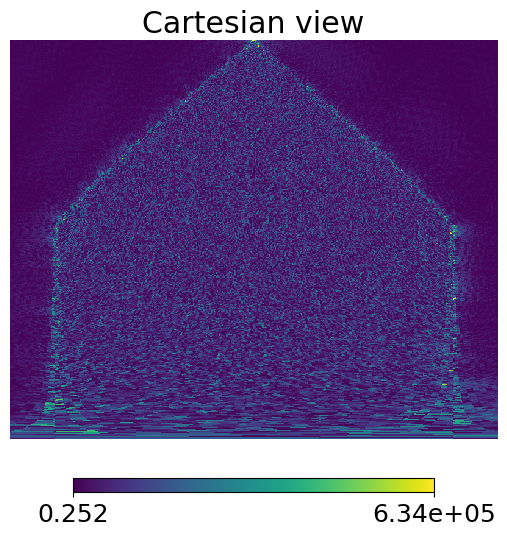

13


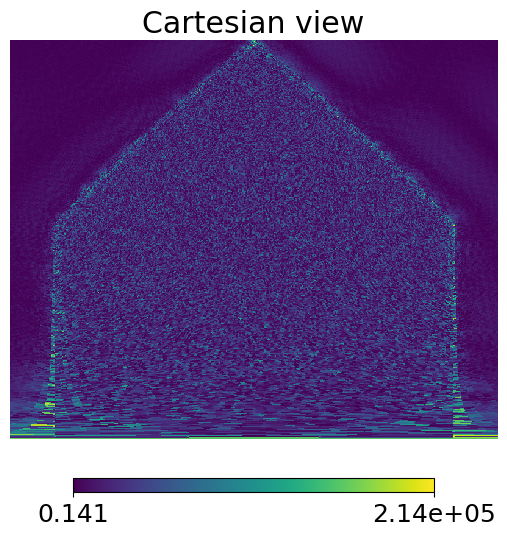

17


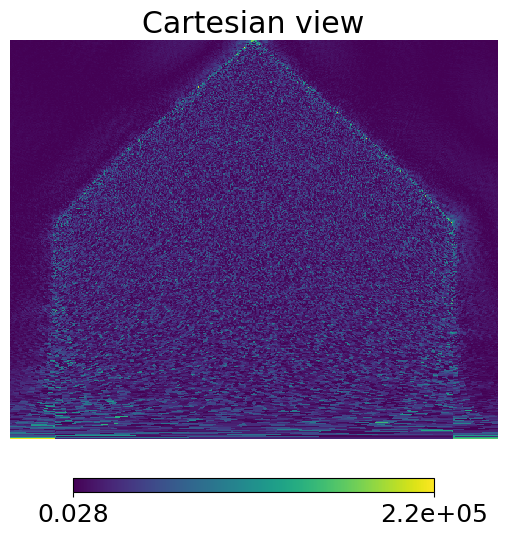

21


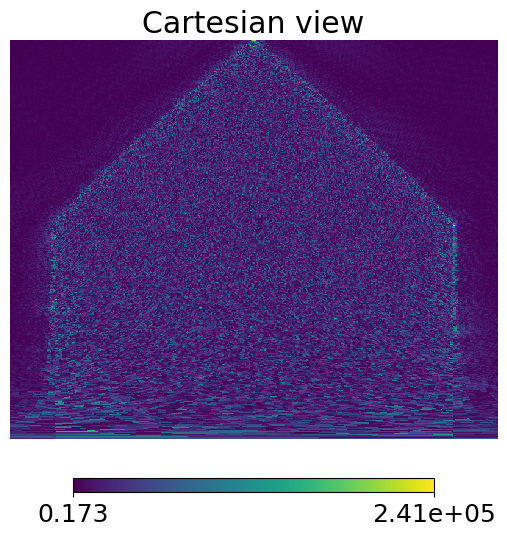

25


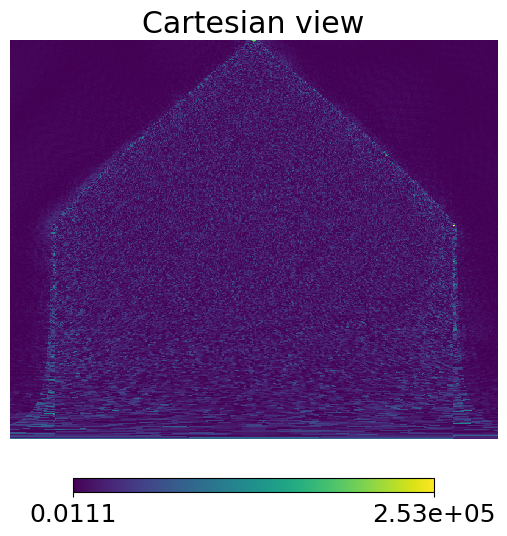

In [13]:
for it in np.arange(1,27,4):
    hp.cartview(np.abs(hp.alm2map(np.nan_to_num(residuals_qe_south_mask[it]),nside=256)), lonra=[80,190], latra=[-90,0])
    print(it)
    plt.show()

In [ ]:
its = [1,2]
incrs = [np.load('/mnt/c/Users/sebas/OneDrive/SCRATCH/delensalot/generic/sims_cmb_len_lminB200_mfda_maskedsky/p_p_sim0000noMF/increment_it{}.npy'.format(it)) for it in its] 

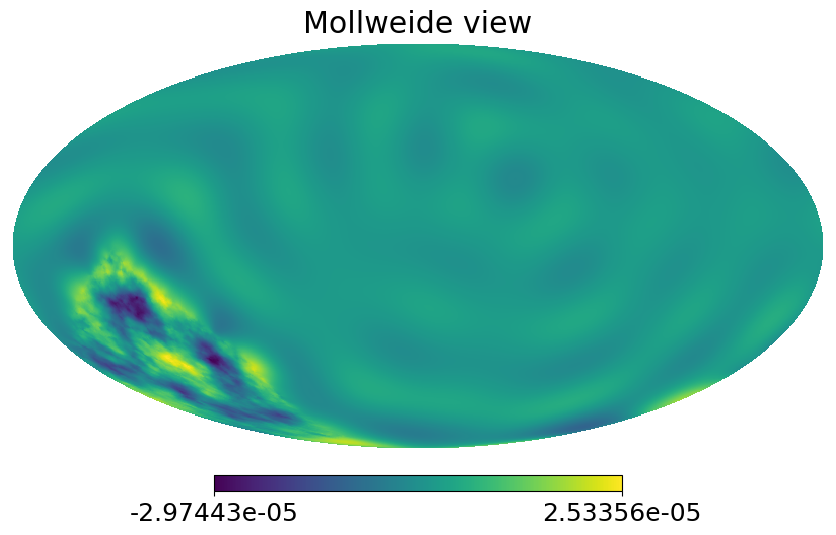

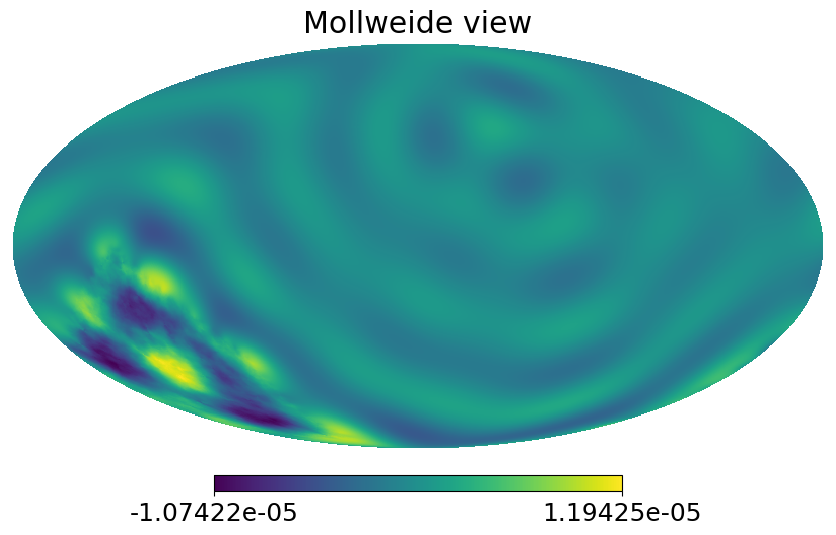

In [ ]:
hp.mollview(hp.alm2map(incrs[0], nside=512))
hp.mollview(hp.alm2map(incrs[1], nside=512))

(10, 4000)

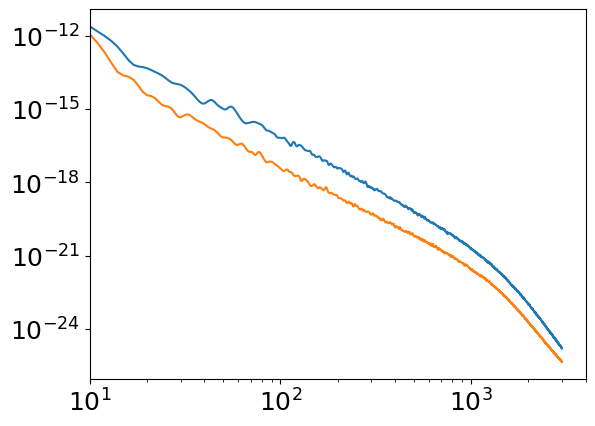

In [ ]:
plt.plot(hp.alm2cl(incrs[0]))
plt.plot(hp.alm2cl(incrs[1]))
plt.loglog()
plt.xlim(10,4000)

In [110]:
its = np.arange(5)
residuals_it1 = [np.load('/mnt/c/Users/sebas/OneDrive/SCRATCH/delensalot/generic/sims_cmb_len_lminB200_mfda_maskedsky/p_p_sim0000noMF/cgsolver/residual_{}_it2.npy'.format(it)) for it in its] 

In [128]:
its = np.arange(8)
residuals_center_it1 = [np.load('/mnt/c/Users/sebas/OneDrive/SCRATCH/delensalot/generic/sims_cmb_len_lminB200_mfda_maskedsky_center/cgsolver/residual_{}_it1.npy'.format(it), allow_pickle=True) for it in its] 

In [ ]:
for it in its: # [10,15,19,21]:
    hp.cartview(np.abs(hp.alm2map(np.nan_to_num(residuals_center_it1[it]),nside=256)), lonra=[210,330], latra=[-45,45])
    if it>0:
        hp.cartview(np.abs(hp.alm2map(np.nan_to_num((residuals_center_it1[it]/residuals_center_it1[0])),nside=256)), lonra=[210,330], latra=[-45,45])
    print('----')
    plt.show()

In [ ]:
for it in its: # [10,15,19,21]:
    hp.cartview(np.abs(hp.alm2map(np.nan_to_num(residuals[it]),nside=512)), lonra=[80,190], latra=[-90,0])
    hp.cartview(np.abs(hp.alm2map(np.nan_to_num(residuals_it1[it]),nside=512)), lonra=[80,190], latra=[-90,0])
    hp.cartview(np.abs(hp.alm2map(np.nan_to_num((residuals_it1[it]/residuals_it1[0])),nside=512)), lonra=[80,190], latra=[-90,0])
    print('----')
    plt.show()